In [1]:
!pip install pinecone-client
!pip install "rerankers[transformers]"

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("cryptocurrency_financial_data.csv")

In [4]:
data

,Link,Heading,full length articles,cryptocurrency type
0,https://finance.yahoo.com/news/ether-prices-do...,Ether Prices in Downtrend as Bitcoin Challenge...,"BTC is up, trading above $64,000 while ETH pri...",Bitcoin
1,https://finance.yahoo.com/news/why-altcoins-we...,Why Altcoins Were Sliding Again Today,This isn't shaping up to be a banner week for ...,Bitcoin
2,https://finance.yahoo.com/news/spot-bitcoin-et...,"Spot Bitcoin ETF Hype Dies Down, Normalcy Sets In",Spot bitcoin ETF flows have slowed after weeks...,Bitcoin
3,https://finance.yahoo.com/news/stocks-grapple-...,"Stocks Grapple With Geopolitical Pressures, Go...",Investors remain on edge as geopolitics contin...,Bitcoin
4,https://finance.yahoo.com/news/crypto-wallet-m...,A crypto wallet maker's warning about an iMess...,A crypto wallet maker claimed this week that h...,Bitcoin
...,...,...,...,...
369,https://finance.yahoo.com/news/xrp-trading-vol...,XRP Trading Volumes Hit $2.5B on South Korean ...,Trading volumes of XRP tokens against the Kore...,Ripple
370,https://finance.yahoo.com/news/xrp-ruling-land...,"XRP Ruling a ‘Landmark’ Judgment, Weakens SEC'...",The U.S. district court ruling that Ripple’s X...,Ripple
371,https://finance.yahoo.com/news/xrp-overtakes-b...,XRP Overtakes BNB to Become 4th Largest Crypto...,Payments-focused cryptocurrency XRP has surpas...,Ripple
372,https://finance.yahoo.com/news/ether-pushes-pa...,Ether Pushes Past $2K as Ripple's Partial Win ...,"Ether (ETH) is trading hands above $2,000, a t...",Ripple


In [5]:
data.head(5)

,Link,Heading,full length articles,cryptocurrency type
0,https://finance.yahoo.com/news/ether-prices-do...,Ether Prices in Downtrend as Bitcoin Challenge...,"BTC is up, trading above $64,000 while ETH pri...",Bitcoin
1,https://finance.yahoo.com/news/why-altcoins-we...,Why Altcoins Were Sliding Again Today,This isn't shaping up to be a banner week for ...,Bitcoin
2,https://finance.yahoo.com/news/spot-bitcoin-et...,"Spot Bitcoin ETF Hype Dies Down, Normalcy Sets In",Spot bitcoin ETF flows have slowed after weeks...,Bitcoin
3,https://finance.yahoo.com/news/stocks-grapple-...,"Stocks Grapple With Geopolitical Pressures, Go...",Investors remain on edge as geopolitics contin...,Bitcoin
4,https://finance.yahoo.com/news/crypto-wallet-m...,A crypto wallet maker's warning about an iMess...,A crypto wallet maker claimed this week that h...,Bitcoin


In [6]:
data.tail(5)

,Link,Heading,full length articles,cryptocurrency type
369,https://finance.yahoo.com/news/xrp-trading-vol...,XRP Trading Volumes Hit $2.5B on South Korean ...,Trading volumes of XRP tokens against the Kore...,Ripple
370,https://finance.yahoo.com/news/xrp-ruling-land...,"XRP Ruling a ‘Landmark’ Judgment, Weakens SEC'...",The U.S. district court ruling that Ripple’s X...,Ripple
371,https://finance.yahoo.com/news/xrp-overtakes-b...,XRP Overtakes BNB to Become 4th Largest Crypto...,Payments-focused cryptocurrency XRP has surpas...,Ripple
372,https://finance.yahoo.com/news/ether-pushes-pa...,Ether Pushes Past $2K as Ripple's Partial Win ...,"Ether (ETH) is trading hands above $2,000, a t...",Ripple
373,https://finance.yahoo.com/news/bitcoin-ether-s...,"Bitcoin, Ether surge after Ripple notched part...",Bitcoin surged on Friday morning in Asia to br...,Ripple


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Link                  374 non-null    object
 1   Heading               373 non-null    object
 2   full length articles  374 non-null    object
 3   cryptocurrency type   371 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB


In [8]:
data["cryptocurrency type"].value_counts()

cryptocurrency type
Bitcoin           102
Ripple            100
Solana             83
Binance Coin       49
Ethereum (ETH)     37
Name: count, dtype: int64

In [9]:
data["cryptocurrency type"].nunique()

5

In [10]:
print(data['full length articles'][0])

BTC is up, trading above $64,000 while ETH prices continue to decline.

The CD20 is flat, trading at 2,174.

Ether {{ETH}} was changing hands just above $3,000 during the opening hours of the Asia trading day as the CoinDesk Indices Ethereum Trend Indicator flipped negative, signaling a bearish shift in momentum.

At the same time, bitcoin {{BTC}}, is trading slightly above $64,000 after challenging it for most of the Asia trading morning.


"Unexpected higher U.S. treasury yields, a stronger dollar, and geopolitical risks in the Middle East weighed down on crypto markets," Jun-young Heo, a Derivatives Trader at Singapore-based Presto, said in an interview on Telegram with CoinDesk.

(CoinDesk Indices)
(CoinDesk Indices)
Yeo said that risk-off sentiment was also reflected in the derivatives market, with funding rates in some exchanges turning negative and three-month basis yields "plunging" to 10%.

"Short-term put options are more expensive than call options for both BTC and ETH," Heo

In [11]:
del data["Link"]

In [12]:
data.isnull().values.sum()

4

In [13]:
data = data.dropna()

In [14]:
data.shape

(370, 3)

In [15]:
len(data[data.duplicated()])

2

In [16]:
data = data.drop_duplicates(subset=None, keep="first", inplace=False)

In [17]:
data.shape

(368, 3)

<Axes: title={'center': 'cryptocurrency name'}>

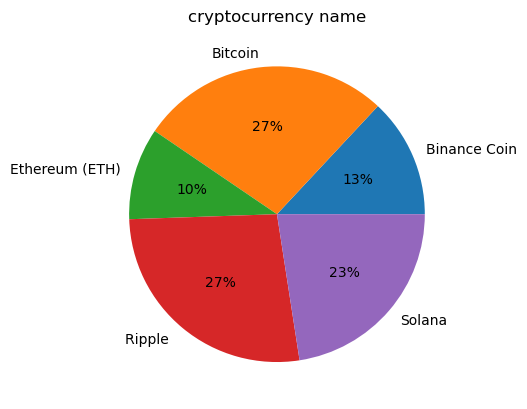

In [18]:
data.groupby('cryptocurrency type').size().plot(kind='pie', title='cryptocurrency name', autopct='%1.0f%%')

In [19]:
import regex as re

def preprocess(text):
    text = text.lower()
    text = re.sub("[^a-z]+", " ", text)
    return text

lis=[]
for i in data["full length articles"]:
    lis.append(preprocess(i))

In [20]:
lis[:3]

['btc is up trading above while eth prices continue to decline the cd is flat trading at ether eth was changing hands just above during the opening hours of the asia trading day as the coindesk indices ethereum trend indicator flipped negative signaling a bearish shift in momentum at the same time bitcoin btc is trading slightly above after challenging it for most of the asia trading morning unexpected higher u s treasury yields a stronger dollar and geopolitical risks in the middle east weighed down on crypto markets jun young heo a derivatives trader at singapore based presto said in an interview on telegram with coindesk coindesk indices coindesk indices yeo said that risk off sentiment was also reflected in the derivatives market with funding rates in some exchanges turning negative and three month basis yields plunging to short term put options are more expensive than call options for both btc and eth heo continued liquidations in the last hours came in almost evenly split between

In [21]:
data["full length articles"]=lis
data

,Heading,full length articles,cryptocurrency type
0,Ether Prices in Downtrend as Bitcoin Challenge...,btc is up trading above while eth prices conti...,Bitcoin
1,Why Altcoins Were Sliding Again Today,this isn t shaping up to be a banner week for ...,Bitcoin
2,"Spot Bitcoin ETF Hype Dies Down, Normalcy Sets In",spot bitcoin etf flows have slowed after weeks...,Bitcoin
3,"Stocks Grapple With Geopolitical Pressures, Go...",investors remain on edge as geopolitics contin...,Bitcoin
4,A crypto wallet maker's warning about an iMess...,a crypto wallet maker claimed this week that h...,Bitcoin
...,...,...,...
369,XRP Trading Volumes Hit $2.5B on South Korean ...,trading volumes of xrp tokens against the kore...,Ripple
370,"XRP Ruling a ‘Landmark’ Judgment, Weakens SEC'...",the u s district court ruling that ripple s xr...,Ripple
371,XRP Overtakes BNB to Become 4th Largest Crypto...,payments focused cryptocurrency xrp has surpas...,Ripple
372,Ether Pushes Past $2K as Ripple's Partial Win ...,ether eth is trading hands above a three month...,Ripple


Summary:
- Read a data using pandas
- Understood the data
- Deleted unwanted columns
- checked for null values and dropped them
- checked for duplicated values and dropped them
- visualized the output column in the form of pie chart
- preprocessed the main input text column which will be further embedded and ingested to the pinecone vector DB

---

**tried embedding a sample text using bge-large model**

In [25]:
from transformers import AutoTokenizer, AutoModel
import torch

sentence_model_name = "BAAI/bge-large-en-v1.5"
sentence_tokenizer = AutoTokenizer.from_pretrained(sentence_model_name)
sentence_model = AutoModel.from_pretrained(sentence_model_name)

def embed_text_sentence_transformer(text):
    encoded_input = sentence_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = sentence_model(**encoded_input)
        sentence_embedding = outputs.pooler_output.squeeze(0)
        embedding_list = sentence_embedding.tolist()

        return embedding_list

text = "machine learning"
embedding = embed_text_sentence_transformer(text)

print(f"Embedding for '{text}': {embedding}")

Embedding for 'machine learning': [-0.8948506712913513, -0.5640844702720642, -0.6880544424057007, -0.9863872528076172, -0.8212943077087402, 0.11162780970335007, -0.9984856247901917, 0.9977185726165771, 0.797306478023529, 0.27103328704833984, 0.45365044474601746, 0.8584817051887512, -0.5913822054862976, -0.7648918628692627, -0.09630674868822098, 0.24743330478668213, -0.9930585622787476, -0.7831756472587585, 0.850526750087738, 0.7665085196495056, -0.38581445813179016, 0.9998397827148438, 0.8303311467170715, -0.9888194799423218, 0.8760926127433777, -0.8387013077735901, 0.8781172633171082, -0.3512256443500519, 0.5528366565704346, -0.8177521824836731, -0.7008552551269531, -0.9811625480651855, -0.9995039701461792, -0.991496741771698, 0.1660277545452118, -0.9998449683189392, 0.9939178824424744, 0.8329187035560608, 0.6823518872261047, -0.9883399605751038, 0.92518550157547, 0.991777777671814, -0.9930785894393921, 0.9899768233299255, 0.934744656085968, 0.8130502104759216, 0.9830636382102966, -0.

**tried ingesting a sample embedded data to pinecone vector db and retrieved it**

In [27]:
from pinecone import Pinecone

pc = Pinecone(api_key="01efe90d-e142-4c7e-a7c5-bc838085a3f8")
index = pc.Index("rag-cluster")

In [28]:
index.upsert(
    vectors=[
        {
            "id": "1234353345352345235445455",
            "values": embedding,
            "metadata": {"sample": "second ingest", "text": text}
        }
    ],
    namespace= "sample2"
)

{'upserted_count': 1}

In [29]:
index.query(
    namespace="sample2",
    vector=embedding,
    top_k=2,
    include_values=True,
    include_metadata=True
)

{'matches': [{'id': '1234353345352345235445455',
              'metadata': {'sample': 'second ingest',
                           'text': 'machine learning'},
              'score': 1.000512,
              'values': [-0.894850671,
                         -0.56408447,
                         -0.688054442,
                         -0.986387253,
                         -0.821294308,
                         0.11162781,
                         -0.998485625,
                         0.997718573,
                         0.797306478,
                         0.271033287,
                         0.453650445,
                         0.858481705,
                         -0.591382205,
                         -0.764891863,
                         -0.0963067487,
                         0.247433305,
                         -0.993058562,
                         -0.783175647,
                         0.85052675,
                         0.76650852,
                         -0.385814458,
 

Summary
- vectorized a sample text ("machine learning") using BGE-LARGE Model
- Dimension of the embedded data is **1024**
- Ingested the embedded text to pinecone vector db
- Retrieved the text using vector similarity search method
- Similarity metric used here is cosine similarity

---

In [32]:
import uuid

sentence_model_name = "BAAI/bge-large-en-v1.5"
sentence_tokenizer = AutoTokenizer.from_pretrained(sentence_model_name)
sentence_model = AutoModel.from_pretrained(sentence_model_name)

Pinecone_client = Pinecone(api_key="01efe90d-e142-4c7e-a7c5-bc838085a3f8")
index = Pinecone_client.Index("rag-cluster")
print("CLUSTER DETAILS: ", index)

def embed_text_data(text):
    encoded_input = sentence_tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        outputs = sentence_model(**encoded_input)
        sentence_embedding = outputs.pooler_output.squeeze(0)
        embedding_list = sentence_embedding.tolist()

        return embedding_list


def ingest_data(text, heading, cryptocurrency_type):
    embedded_list = embed_text_data(text)
    unique_id = str(uuid.uuid4())
    ingest_data = [
        {
            "id": unique_id,
            "values": embedded_list,
            "metadata": {"text": text, "title": heading, "cryptocurrency": cryptocurrency_type}
        }
    ]

    request = index.upsert(vectors=ingest_data, namespace= "Main_Financial_data")
    return request

CLUSTER DETAILS:  <pinecone.data.index.Index object at 0x169ecb980>


In [33]:
data

,Heading,full length articles,cryptocurrency type
0,Ether Prices in Downtrend as Bitcoin Challenge...,btc is up trading above while eth prices conti...,Bitcoin
1,Why Altcoins Were Sliding Again Today,this isn t shaping up to be a banner week for ...,Bitcoin
2,"Spot Bitcoin ETF Hype Dies Down, Normalcy Sets In",spot bitcoin etf flows have slowed after weeks...,Bitcoin
3,"Stocks Grapple With Geopolitical Pressures, Go...",investors remain on edge as geopolitics contin...,Bitcoin
4,A crypto wallet maker's warning about an iMess...,a crypto wallet maker claimed this week that h...,Bitcoin
...,...,...,...
369,XRP Trading Volumes Hit $2.5B on South Korean ...,trading volumes of xrp tokens against the kore...,Ripple
370,"XRP Ruling a ‘Landmark’ Judgment, Weakens SEC'...",the u s district court ruling that ripple s xr...,Ripple
371,XRP Overtakes BNB to Become 4th Largest Crypto...,payments focused cryptocurrency xrp has surpas...,Ripple
372,Ether Pushes Past $2K as Ripple's Partial Win ...,ether eth is trading hands above a three month...,Ripple


In [34]:
for text,title,types in zip(data["full length articles"], data["Heading"], data["cryptocurrency type"]):
    ingest_data(text=text, heading=title, cryptocurrency_type=types)
    print("DONE")


DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE


Summary:
- Created a function to embed the text data
- created another method which will get the required inputs like title of the article, text and type, further passes the text to embed method embeds the text data, then the embedded text data along with the unique id generated using uuid and metadata including heading and cryptocurrency type is ingested to pinecone vector DB
- Namespace here is considered as Financial_data
- Then a for loop is created iterates over dataframe passes the required input to ingest_data method by which the data will get ingested

---

In [37]:
def embed_query(query):
    encoded_input = sentence_tokenizer(query, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        outputs = sentence_model(**encoded_input)
        sentence_embedding = outputs.pooler_output.squeeze(0)
        embedding_list = sentence_embedding.tolist()

        return embedding_list


def retrieve_data(query):
    embedded_list = embed_query(query)
    response = index.query(
    namespace="Main_Financial_data",
    vector=embedded_list,
    top_k=20,
    include_values=False,
    include_metadata=True
    )
    return response

result = retrieve_data(query = "what is Ripple")

In [38]:
result

{'matches': [{'id': 'dbdbd409-abf9-4a62-9e8b-11a88084e3db',
              'metadata': {'cryptocurrency': 'Ripple ',
                           'text': 'in this issue ripple labs more turbulence '
                                   'ahead forkast nft index entering a '
                                   'historically slow period hong kong banks '
                                   'going back and forth from the editor s '
                                   'desk dear reader the crypto community can '
                                   'be forgiven for feeling a little '
                                   'schadenfreude in recent days after we all '
                                   'watched a judge in the southern district '
                                   'of new york stick it to the securities and '
                                   'exchange commission in its case against '
                                   'ripple labs but as many in the digital '
                             

In [39]:
lis_text = []
lis_score = []
lis_cryptocurrency = []
for i in result["matches"]:
    lis_text.append(i["metadata"]["text"])
    lis_score.append(i["score"])
    lis_cryptocurrency.append(i["metadata"]["cryptocurrency"])

new_data = pd.DataFrame({
    "text": lis_text,
    "cryptocurrency_type": lis_cryptocurrency,
    "similarity_score": lis_score
})

print(new_data)

                                                 text cryptocurrency_type  \
0   in this issue ripple labs more turbulence ahea...             Ripple    
1   in this issue ripple labs more turbulence ahea...             Ripple    
2   in this issue ripple labs more turbulence ahea...             Ripple    
3   in this issue ripple labs more turbulence ahea...             Ripple    
4   in this issue ripple labs more turbulence ahea...             Ripple    
5   in this issue ripple labs more turbulence ahea...             Ripple    
6   in this issue ripple labs more turbulence ahea...             Ripple    
7   wormhole a cross chain interoperability protoc...              Solana   
8   wormhole a cross chain interoperability protoc...              Solana   
9   wormhole a cross chain interoperability protoc...              Solana   
10  wormhole a cross chain interoperability protoc...              Solana   
11  wormhole a cross chain interoperability protoc...              Solana   

Summary:

- Added a same embedding method which will embed the query
- Another method was added which will take the input query in pass it to the embedding method further this embedded query is passed to the query search method which will perform vector search and retrieve the relavant contect from the vector db
- topK is considered as 20, to retrieve top 20 related context from the db
- include_metadata is considered as True, so that in the response metadata can also be displayed
- include_values considered as False, as we don't want the vectors of each text to be printed

---

### RERANKING

#### ColBERT Reranking

In [44]:
from rerankers import Reranker
ranker_colbert = Reranker("colbert")
results = ranker_colbert.rank(query="I love chocolates",
                              docs=["I hate sweets", "I really like chocolates"],
                              doc_ids=[0,1])

Loading default colbert model for language en
Default Model: colbert-ir/colbertv2.0
Loading ColBERTRanker model colbert-ir/colbertv2.0
No device set
Using device mps
No dtype set
Using dtype torch.float16
Loading model colbert-ir/colbertv2.0, this might take a while...


/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [45]:
results

RankedResults(results=[Result(document=Document(text='I really like chocolates', doc_id=1, metadata={}), score=1.6899166107177734, rank=1), Result(document=Document(text='I hate sweets', doc_id=0, metadata={}), score=1.4649187326431274, rank=2)], query='I love chocolates', has_scores=True)

#### T5 Reranking

In [47]:
ranker_t5 = Reranker("t5")
results = ranker_t5.rank(query="I love chocolates",
                         docs=["I hate sweets", "I really like chocolates"],
                         doc_ids=[0,1])

Loading default t5 model for language en
Default Model: unicamp-dl/InRanker-base
Loading T5Ranker model unicamp-dl/InRanker-base
No device set
Using device cpu
No dtype set
Device set to `cpu`, setting dtype to `float32`
Using dtype torch.float32
Loading model unicamp-dl/InRanker-base, this might take a while...
Using device cpu.
Using dtype torch.float32.


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


T5 true token set to ▁true
T5 false token set to ▁false
Returning normalised scores...
Inputs template set to Query: {query} Document: {text} Relevant:


Scoring...:   0%|          | 0/1 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [48]:
results

RankedResults(results=[Result(document=Document(text='I really like chocolates', doc_id=1, metadata={}), score=0.967340886592865, rank=1), Result(document=Document(text='I hate sweets', doc_id=0, metadata={}), score=0.0016840137541294098, rank=2)], query='I love chocolates', has_scores=True)

#### Crossencoder Reranking

In [50]:
ranker_crossencoder = Reranker('cross-encoder')
results_crossencoder = ranker_crossencoder.rank(query="I love chocolates",
                                 docs=["I hate sweets", "I really like chocolates"],
                                 doc_ids=[0,1])

Loading default cross-encoder model for language en
If your model is NOT intended to be ran as a one-label cross-encoder, please reload it and specify the model_type! Otherwise, you may ignore this warning. You may specify `model_type='cross-encoder'` to suppress this warning in the future.
Default Model: mixedbread-ai/mxbai-rerank-base-v1
Loading TransformerRanker model mixedbread-ai/mxbai-rerank-base-v1
No device set
Using device mps
No dtype set
Using dtype torch.float16
Loaded model mixedbread-ai/mxbai-rerank-base-v1
Using device mps.
Using dtype torch.float16.


In [51]:
results

RankedResults(results=[Result(document=Document(text='I really like chocolates', doc_id=1, metadata={}), score=0.967340886592865, rank=1), Result(document=Document(text='I hate sweets', doc_id=0, metadata={}), score=0.0016840137541294098, rank=2)], query='I love chocolates', has_scores=True)

Summary:

- Implemented 3 different types of Reranking models, and they are:
    - ColBERT
    - T5
    - Crossencoder
- As a first step installed the required package using pip
- Secondly, Imported all required methoda, and Implemented all the reranking models with sample query and docs to see how model is performing

---

### Reranking with Pinecone RAG and financial data

#### Preparing list for the Docs with the retrieved context

In [56]:
result["matches"]
lis = []
for i in result["matches"]:
    lis.append(i["metadata"]["text"])

In [57]:
lis

['in this issue ripple labs more turbulence ahead forkast nft index entering a historically slow period hong kong banks going back and forth from the editor s desk dear reader the crypto community can be forgiven for feeling a little schadenfreude in recent days after we all watched a judge in the southern district of new york stick it to the securities and exchange commission in its case against ripple labs but as many in the digital asset industry quickly began to realize when details of the verdict emerged it was a little premature to pop the champagne and the payback time mood was short lived true the sec appears to have suffered a setback in its crusade to regulate some might say crush crypto by enforcement and the ripple linked token xrp almost doubled in value on the news with trading volumes briefly topping those of all other cryptocurrencies but the victory was only partial more importantly it failed to provide the eureka moment of unambiguous regulatory clarity that the crypt

In [58]:
len(lis)

20

#### Preparing docs and doc_ids

In [60]:
doc_ids = list(range(len(lis)))
selected_docs = [lis[i] for i in doc_ids]

In [61]:
print(doc_ids)
print(selected_docs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
['in this issue ripple labs more turbulence ahead forkast nft index entering a historically slow period hong kong banks going back and forth from the editor s desk dear reader the crypto community can be forgiven for feeling a little schadenfreude in recent days after we all watched a judge in the southern district of new york stick it to the securities and exchange commission in its case against ripple labs but as many in the digital asset industry quickly began to realize when details of the verdict emerged it was a little premature to pop the champagne and the payback time mood was short lived true the sec appears to have suffered a setback in its crusade to regulate some might say crush crypto by enforcement and the ripple linked token xrp almost doubled in value on the news with trading volumes briefly topping those of all other cryptocurrencies but the victory was only partial more importantly it failed to pro

#### ColBERT Reranking

In [63]:
ranker_colbert = Reranker("colbert")
results_colbert = ranker_colbert.rank(query="what is Ripple",
                              docs=selected_docs,
                              doc_ids=doc_ids)

Loading default colbert model for language en
Default Model: colbert-ir/colbertv2.0
Loading ColBERTRanker model colbert-ir/colbertv2.0
No device set
Using device mps
No dtype set
Using dtype torch.float16
Loading model colbert-ir/colbertv2.0, this might take a while...


/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [64]:
results_colbert

RankedResults(results=[Result(document=Document(text='in this issue ripple labs more turbulence ahead forkast nft index entering a historically slow period hong kong banks going back and forth from the editor s desk dear reader the crypto community can be forgiven for feeling a little schadenfreude in recent days after we all watched a judge in the southern district of new york stick it to the securities and exchange commission in its case against ripple labs but as many in the digital asset industry quickly began to realize when details of the verdict emerged it was a little premature to pop the champagne and the payback time mood was short lived true the sec appears to have suffered a setback in its crusade to regulate some might say crush crypto by enforcement and the ripple linked token xrp almost doubled in value on the news with trading volumes briefly topping those of all other cryptocurrencies but the victory was only partial more importantly it failed to provide the eureka mom

In [65]:
print(new_data.head(5))

colbert_text = []
colbert_score = []
colbert_rank = []

for result in results_colbert.results:
    colbert_text.append(result.document.text)
    colbert_score.append(result.score)
    colbert_rank.append(result.rank)

new_data["colbert_text"] = colbert_text
new_data["colbert_score"] = colbert_score
new_data["colbert_rank"] = colbert_rank

print(new_data)

                                                text cryptocurrency_type  \
0  in this issue ripple labs more turbulence ahea...             Ripple    
1  in this issue ripple labs more turbulence ahea...             Ripple    
2  in this issue ripple labs more turbulence ahea...             Ripple    
3  in this issue ripple labs more turbulence ahea...             Ripple    
4  in this issue ripple labs more turbulence ahea...             Ripple    

   similarity_score  
0          0.944080  
1          0.944080  
2          0.944080  
3          0.944079  
4          0.944079  
                                                 text cryptocurrency_type  \
0   in this issue ripple labs more turbulence ahea...             Ripple    
1   in this issue ripple labs more turbulence ahea...             Ripple    
2   in this issue ripple labs more turbulence ahea...             Ripple    
3   in this issue ripple labs more turbulence ahea...             Ripple    
4   in this issue ripple l

#### T5 Reranking

In [67]:
ranker_t5 = Reranker("t5")
results_t5 = ranker_t5.rank(query="what is Ripple", docs=selected_docs, doc_ids=doc_ids)

Loading default t5 model for language en
Default Model: unicamp-dl/InRanker-base
Loading T5Ranker model unicamp-dl/InRanker-base
No device set
Using device cpu
No dtype set
Device set to `cpu`, setting dtype to `float32`
Using dtype torch.float32
Loading model unicamp-dl/InRanker-base, this might take a while...
Using device cpu.
Using dtype torch.float32.
T5 true token set to ▁true
T5 false token set to ▁false
Returning normalised scores...
Inputs template set to Query: {query} Document: {text} Relevant:


/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Scoring...:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
results_t5

RankedResults(results=[Result(document=Document(text='in this issue ripple labs more turbulence ahead forkast nft index entering a historically slow period hong kong banks going back and forth from the editor s desk dear reader the crypto community can be forgiven for feeling a little schadenfreude in recent days after we all watched a judge in the southern district of new york stick it to the securities and exchange commission in its case against ripple labs but as many in the digital asset industry quickly began to realize when details of the verdict emerged it was a little premature to pop the champagne and the payback time mood was short lived true the sec appears to have suffered a setback in its crusade to regulate some might say crush crypto by enforcement and the ripple linked token xrp almost doubled in value on the news with trading volumes briefly topping those of all other cryptocurrencies but the victory was only partial more importantly it failed to provide the eureka mom

In [69]:
print(new_data.head(5))

t5_text = []
t5_score = []
t5_rank = []

for result in results_t5.results:
    t5_text.append(result.document.text)
    t5_score.append(result.score)
    t5_rank.append(result.rank)

new_data["t5_text"] = t5_text
new_data["t5_score"] = t5_score
new_data["t5_rank"] = t5_rank

print(new_data.head(5))

                                                text cryptocurrency_type  \
0  in this issue ripple labs more turbulence ahea...             Ripple    
1  in this issue ripple labs more turbulence ahea...             Ripple    
2  in this issue ripple labs more turbulence ahea...             Ripple    
3  in this issue ripple labs more turbulence ahea...             Ripple    
4  in this issue ripple labs more turbulence ahea...             Ripple    

   similarity_score                                       colbert_text  \
0          0.944080  in this issue ripple labs more turbulence ahea...   
1          0.944080  in this issue ripple labs more turbulence ahea...   
2          0.944080  in this issue ripple labs more turbulence ahea...   
3          0.944079  in this issue ripple labs more turbulence ahea...   
4          0.944079  in this issue ripple labs more turbulence ahea...   

   colbert_score  colbert_rank  
0       1.307284             1  
1       1.307284             2  

#### Crossencoder Reranking

In [71]:
ranker_crossencoder = Reranker('cross-encoder')
results_crossencoder = ranker_crossencoder.rank(query="what is Ripple",
                              docs=selected_docs,
                              doc_ids=doc_ids)

Loading default cross-encoder model for language en
If your model is NOT intended to be ran as a one-label cross-encoder, please reload it and specify the model_type! Otherwise, you may ignore this warning. You may specify `model_type='cross-encoder'` to suppress this warning in the future.
Default Model: mixedbread-ai/mxbai-rerank-base-v1
Loading TransformerRanker model mixedbread-ai/mxbai-rerank-base-v1
No device set
Using device mps
No dtype set
Using dtype torch.float16
Loaded model mixedbread-ai/mxbai-rerank-base-v1
Using device mps.
Using dtype torch.float16.


In [72]:
results_crossencoder

RankedResults(results=[Result(document=Document(text='in this issue ripple labs more turbulence ahead forkast nft index entering a historically slow period hong kong banks going back and forth from the editor s desk dear reader the crypto community can be forgiven for feeling a little schadenfreude in recent days after we all watched a judge in the southern district of new york stick it to the securities and exchange commission in its case against ripple labs but as many in the digital asset industry quickly began to realize when details of the verdict emerged it was a little premature to pop the champagne and the payback time mood was short lived true the sec appears to have suffered a setback in its crusade to regulate some might say crush crypto by enforcement and the ripple linked token xrp almost doubled in value on the news with trading volumes briefly topping those of all other cryptocurrencies but the victory was only partial more importantly it failed to provide the eureka mom

In [73]:
print(new_data.head(5))

crossencoder_text = []
crossencoder_score = []
crossencoder_rank = []

for result in results_crossencoder.results:
    crossencoder_text.append(result.document.text)
    crossencoder_score.append(result.score)
    crossencoder_rank.append(result.rank)

new_data["crossencoder_text"] = crossencoder_text
new_data["crossencoder_score"] = crossencoder_score
new_data["crossencoder_rank"] = crossencoder_rank

print(new_data)

                                                text cryptocurrency_type  \
0  in this issue ripple labs more turbulence ahea...             Ripple    
1  in this issue ripple labs more turbulence ahea...             Ripple    
2  in this issue ripple labs more turbulence ahea...             Ripple    
3  in this issue ripple labs more turbulence ahea...             Ripple    
4  in this issue ripple labs more turbulence ahea...             Ripple    

   similarity_score                                       colbert_text  \
0          0.944080  in this issue ripple labs more turbulence ahea...   
1          0.944080  in this issue ripple labs more turbulence ahea...   
2          0.944080  in this issue ripple labs more turbulence ahea...   
3          0.944079  in this issue ripple labs more turbulence ahea...   
4          0.944079  in this issue ripple labs more turbulence ahea...   

   colbert_score  colbert_rank  \
0       1.307284             1   
1       1.307284             2

In [74]:
new_data.head(5)

,text,cryptocurrency_type,similarity_score,colbert_text,colbert_score,colbert_rank,t5_text,t5_score,t5_rank,crossencoder_text,crossencoder_score,crossencoder_rank
0,in this issue ripple labs more turbulence ahea...,Ripple,0.944080,in this issue ripple labs more turbulence ahea...,1.307284,1,in this issue ripple labs more turbulence ahea...,0.002984,1,in this issue ripple labs more turbulence ahea...,-2.439453,1
1,in this issue ripple labs more turbulence ahea...,Ripple,0.944080,in this issue ripple labs more turbulence ahea...,1.307284,2,in this issue ripple labs more turbulence ahea...,0.002984,2,in this issue ripple labs more turbulence ahea...,-2.439453,2
2,in this issue ripple labs more turbulence ahea...,Ripple,0.944080,in this issue ripple labs more turbulence ahea...,1.307284,3,in this issue ripple labs more turbulence ahea...,0.002984,3,in this issue ripple labs more turbulence ahea...,-2.439453,3
3,in this issue ripple labs more turbulence ahea...,Ripple,0.944079,in this issue ripple labs more turbulence ahea...,1.307284,4,in this issue ripple labs more turbulence ahea...,0.002984,4,in this issue ripple labs more turbulence ahea...,-2.439453,4
4,in this issue ripple labs more turbulence ahea...,Ripple,0.944079,in this issue ripple labs more turbulence ahea...,1.307284,5,in this issue ripple labs more turbulence ahea...,0.002984,5,in this issue ripple labs more turbulence ahea...,-2.439453,5


Summary:

- Implemented all the three reranking techniques to the retrieved financial data context which was retrieved using cosine similarity score technique
- After Implementing all the three reranking models we got the rank, score and text as output which was further added to the dataframe
- And as a conclusion we have created a dataframe which contains the top 20 retrieved text context from db using cosine similaruty method along with the score, following which we have also added the outputs of all the three reranking techniques to the dataframe

---

### Evaluation

#### Comparing and evaluating all the three reranking models and 

In [79]:
import pandas as pd
from sklearn.metrics import ndcg_score, average_precision_score, precision_score
from sklearn.model_selection import train_test_split

# Function to get top K scores
def get_top_k(scores, k):
    return sorted(scores, reverse=True)[:k]

# Calculate Recall
def recall_at_k(scores, k):
    top_k_scores = get_top_k(scores, k)
    relevant = sum(1 for score in top_k_scores if score > 0)
    return relevant / k

# Calculate MRR
def mean_reciprocal_rank(scores):
    sorted_scores = sorted(scores, reverse=True)
    for i, score in enumerate(sorted_scores):
        if score > 0:
            return 1 / (i + 1)
    return 0

# Calculate Precision
def precision_at_k(scores, k):
    top_k_scores = get_top_k(scores, k)
    relevant = sum(1 for score in top_k_scores if score > 0)
    return relevant / k

In [80]:
df = new_data

# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2)

relevance_labels = [1] * len(test_data)

# Extract scores from the test data
baseline_scores = test_data['similarity_score'].tolist()
colbert_scores = test_data['colbert_score'].tolist()
t5_scores = test_data['t5_score'].tolist()
crossencoder_scores = test_data['crossencoder_score'].tolist()

# Calculate NDCG scores`
ndcg_scores = {
    "colbert": ndcg_score([relevance_labels], [colbert_scores]),
    "t5": ndcg_score([relevance_labels], [t5_scores]),
    "crossencoder": ndcg_score([relevance_labels], [crossencoder_scores]),
}

# Calculate MAP scores
map_scores = {
    "colbert": average_precision_score(relevance_labels, colbert_scores),
    "t5": average_precision_score(relevance_labels, t5_scores),
    "crossencoder": average_precision_score(relevance_labels, crossencoder_scores),
}


recall_scores = {
    "colbert": recall_at_k(colbert_scores, 10),
    "t5": recall_at_k(t5_scores, 10),
    "crossencoder": recall_at_k(crossencoder_scores, 10),
}


mrr_scores = {
    "colbert": mean_reciprocal_rank(colbert_scores),
    "t5": mean_reciprocal_rank(t5_scores),
    "crossencoder": mean_reciprocal_rank(crossencoder_scores),
}


precision_scores = {
    "colbert": precision_at_k(colbert_scores, 10),
    "t5": precision_at_k(t5_scores, 10),
    "crossencoder": precision_at_k(crossencoder_scores, 10),
}

print("NDCG Scores:", ndcg_scores)
print("MAP Scores:", map_scores)
print("Recall@10 Scores:", recall_scores)
print("MRR Scores:", mrr_scores)
print("Precision@10 Scores:", precision_scores)


best_model = max(mrr_scores, key=mrr_scores.get)
print("Best performing model based on MRR:", best_model)

best_model = max(ndcg_scores, key=ndcg_scores.get)
print("Best performing model based on NDCG:", best_model)

best_model = max(map_scores, key=map_scores.get)
print("Best performing model based on MAP:", best_model)

best_model = max(recall_scores, key=recall_scores.get)
print("Best performing model based on Recall:", best_model)

best_model = max(precision_scores, key=precision_scores.get)
print("Best performing model based on Precision:", best_model)

NDCG Scores: {'colbert': 0.9999999999999998, 't5': 0.9999999999999998, 'crossencoder': 0.9999999999999998}
MAP Scores: {'colbert': 1.0, 't5': 1.0, 'crossencoder': 1.0}
Recall@10 Scores: {'colbert': 0.4, 't5': 0.4, 'crossencoder': 0.0}
MRR Scores: {'colbert': 1.0, 't5': 1.0, 'crossencoder': 0}
Precision@10 Scores: {'colbert': 0.4, 't5': 0.4, 'crossencoder': 0.0}
Best performing model based on MRR: colbert
Best performing model based on NDCG: colbert
Best performing model based on MAP: colbert
Best performing model based on Recall: colbert
Best performing model based on Precision: colbert


Summary:
- In order to find the best reranking model we calculated NDCG, MRR, MAP, Recall and Precision scores
- Based on the comparison and evaluation it is acknowledged that **ColBERT Reranking** model is performing better when compared to all the reranking methods

---